In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

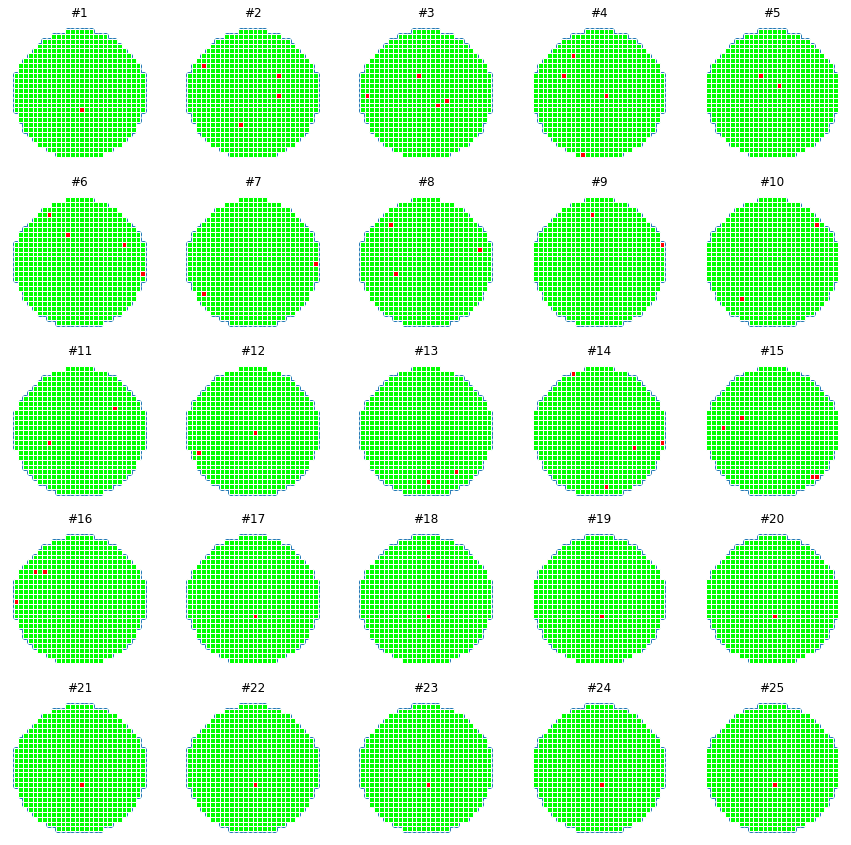

In [2]:
def annotate(df):
    df['annotate'] = 0
    for n in range(25):
        start, end = int(n*578), int((n+1)*578)
        df.iloc[start:end,-1] = n+1
    return df
            

df = pd.read_csv('test.csv', encoding = 'utf-8')
df = annotate(df)

fig, axes = plt.subplots(5,5,figsize=(15,15))
for n, ax in enumerate(axes.ravel()):
    start, end = int(n*578), int((n+1)*578)
    _df = df.iloc[start:end,:]
    X, Y = _df.loc[:,'XAdr'].values, _df.loc[:,'YAdr'].values
    paris = np.c_[X,Y] - np.array([.5,.5])
    defects = _df['SBin#'].values
    
    ax.scatter(X,Y)
    for pair, defect in zip(paris,defects):
        _x, _y = pair
        ax.add_patch(
             patches.Rectangle(
                (_x, _y),
                1.0,
                1.0,
                edgecolor = 'white',
                facecolor = 'lime' if defect < 24 else 'red',
                fill=True
             ) )
    ax.set_title('#%d'%(n+1))
    ax.axis('off')
    ax.invert_yaxis()
    
plt.show()